Saving polydata.mat to polydata (7).mat
['__header__', '__version__', '__globals__', 'a', 'b']
一階擬合係數 (p=1): [ 0.21420657 -0.11914375]
二階擬合係數 (p=2): [ 0.70457821 -0.53816173  0.00876409]
三階擬合係數 (p=3): [ 0.7962603  -0.58567433  0.03305325 -0.04418475]


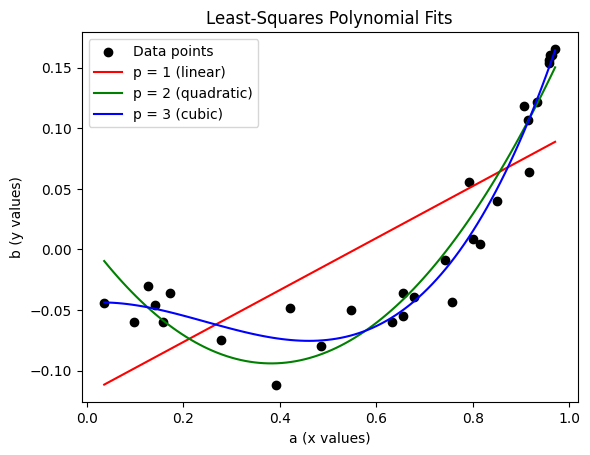

In [8]:
from google.colab import files
uploaded = files.upload()
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

in_data = loadmat('polydata.mat')
#loadmat() loads a matlab workspace into a python dictionary, where the names of the variables are the keys
#in the dictionary.  To see what variables are loaded, uncomment the line below:
print([key for key in in_data])

# b = in_data['b']
# print(b)
# a = in_data['a']
# print(a)
# M = in_data['M']
# print(M)
# np.linalg.matrix_rank(M)
# w1 = np.sqrt(5)/5 * np.sum(M, axis = 0)
# print(w1)
# t1 = [1, 1, 1, 1, 1]/np.sqrt(5)
# print(t1)
# print(M - np.outer(t1, w1))

# 提供的數據
a = np.array(in_data['a'])

b = np.array(in_data['b'])

# 轉換成一維數組
x = a.flatten()
y = b.flatten()

# 計算一階、二階和三階的多項式擬合
p1 = np.polyfit(x, y, 1)  # 一階
p2 = np.polyfit(x, y, 2)  # 二階
p3 = np.polyfit(x, y, 3)  # 三階

print("一階擬合係數 (p=1):", p1)
print("二階擬合係數 (p=2):", p2)
print("三階擬合係數 (p=3):", p3)

# 生成 x 軸數據以繪製擬合曲線
x_fit = np.linspace(min(x), max(x), 100)

# 使用擬合的多項式計算對應的 y 值
y_fit_p1 = np.polyval(p1, x_fit)
y_fit_p2 = np.polyval(p2, x_fit)
y_fit_p3 = np.polyval(p3, x_fit)

# 繪製數據點
plt.scatter(x, y, color='black', label='Data points')

# 繪製擬合曲線
plt.plot(x_fit, y_fit_p1, label='p = 1 (linear)', color='red')
plt.plot(x_fit, y_fit_p2, label='p = 2 (quadratic)', color='green')
plt.plot(x_fit, y_fit_p3, label='p = 3 (cubic)', color='blue')

# 標題和標籤
plt.title('Least-Squares Polynomial Fits')
plt.xlabel('a (x values)')
plt.ylabel('b (y values)')
plt.legend()

# 顯示圖像
plt.show()


In [34]:
from google.colab import files
uploaded = files.upload()
import numpy as np

def gram_schmidt(B):
    """Orthogonalize a set of vectors stored as the columns of matrix B."""
    # Get the number of vectors.
    m, n = B.shape
    # Create new matrix to hold the orthonormal basis
    U = np.zeros([m,n])
    for j in range(n):
        # To orthogonalize the vector in column j with respect to the
        # previous vectors, subtract from it its projection onto
        # each of the previous vectors.
        v = B[:,j].copy()
        for k in range(j):
            v -= np.dot(U[:, k], B[:, j]) * U[:, k]
        if np.linalg.norm(v)>1e-10:
            U[:, j] = v / np.linalg.norm(v)
    return U

if __name__ == '__main__':
    in_data = loadmat('movie.mat')
    # print([key for key in in_data])
    X = np.array(in_data['X'])
    # print(X)
    X_hat = np.hstack((np.ones((X.shape[0], 1)), X))
    # print(X_hat)
    X_hat_b = gram_schmidt(X_hat)
    # print(X_hat_b)
    # print(1/np.sqrt(5))
    t1 = X_hat_b[:,0]
    # print(t1)

    # (b)==========
    print("=============(b)=============")
    W = t1.T @ X
    print("W:")
    print(W)
    # print(30/np.sqrt(5))
    E = X - t1.reshape(-1,1) @ W.reshape(1,7)
    print("Residual error:")
    print(E)
    # (c)==========
    print("=============(c)=============")
    t2 = X_hat_b[:,1]
    print(t2)
    T = np.hstack((t1.reshape(-1,1), t2.reshape(-1,1)))
    W = T.T @ X
    print("W:")
    print(W)
    print("Residual error:")
    print(X - T @ W)
    print(t2)
    # (d)==========
    print("=============(d)=============")
    t3 = X_hat_b[:,2]
    T = np.hstack((t1.reshape(-1,1), t2.reshape(-1,1), t3.reshape(-1,1)))
    W = T.T @ X
    print("W:")
    print(W)
    print("Residual error:")
    print(X - T @ W)
    # print(t3)

Saving movie.mat to movie (21).mat
=============(b)=============
W:
[13.41640786 12.96919427  8.04984472 15.20526225 17.44133022  9.8386991
  5.81377674]
Residual error:
[[-2.   1.2 -1.6  1.2 -0.8 -0.4 -0.6]
 [ 3.  -2.8  1.4 -0.8  2.2  0.6  2.4]
 [-2.   2.2 -0.6  0.2 -1.8 -0.4 -1.6]
 [ 3.  -3.8  2.4 -1.8  1.2  0.6  1.4]
 [-2.   3.2 -1.6  1.2 -0.8 -0.4 -1.6]]
=============(c)=============
[-0.36514837  0.54772256 -0.36514837  0.54772256 -0.36514837]
W:
[[13.41640786 12.96919427  8.04984472 15.20526225 17.44133022  9.8386991
   5.81377674]
 [ 5.47722558 -6.02494813  3.46890953 -2.37346442  3.10376116  1.09544512
   3.46890953]]
Residual error:
[[ 4.44089210e-16 -1.00000000e+00 -3.33333333e-01  3.33333333e-01
   3.33333333e-01  4.44089210e-16  6.66666667e-01]
 [ 1.77635684e-15  5.00000000e-01 -5.00000000e-01  5.00000000e-01
   5.00000000e-01  8.88178420e-16  5.00000000e-01]
 [ 4.44089210e-16  0.00000000e+00  6.66666667e-01 -6.66666667e-01
  -6.66666667e-01  4.44089210e-16 -3.33333333e-01]